In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [90]:
path = '/home/physics/DAE_proeject_1/bugzero_bughouse_data.csv'

df = pd.read_csv(path)



In [46]:
df.head(5)

,bugzero_win,complexity_pref1,complexity_pref2,opponent1_aggression,opponent1_opening,opponent1_rating,opponent2_aggression,opponent2_opening,opponent2_rating,opponent_id
0,0,0.59,0.41,0.38,French Defense,2299,0.15,King's Gambit,2385,1
1,0,0.49,0.75,0.34,Ruy López,2172,0.45,Sicilian Defense,2582,2
2,0,0.19,0.69,0.33,Sicilian Defense,2330,0.53,Queen's Gambit,1920,3
3,0,0.46,0.99,0.44,Queen's Gambit,2505,0.38,King's Gambit,2313,4
4,1,0.25,0.28,0.50,Scandinavian Defense,2153,0.50,Scandinavian Defense,2070,5


In [47]:
df

,bugzero_win,complexity_pref1,complexity_pref2,opponent1_aggression,opponent1_opening,opponent1_rating,opponent2_aggression,opponent2_opening,opponent2_rating,opponent_id
0,0,0.59,0.41,0.38,French Defense,2299,0.15,King's Gambit,2385,1
1,0,0.49,0.75,0.34,Ruy López,2172,0.45,Sicilian Defense,2582,2
2,0,0.19,0.69,0.33,Sicilian Defense,2330,0.53,Queen's Gambit,1920,3
3,0,0.46,0.99,0.44,Queen's Gambit,2505,0.38,King's Gambit,2313,4
4,1,0.25,0.28,0.50,Scandinavian Defense,2153,0.50,Scandinavian Defense,2070,5
...,...,...,...,...,...,...,...,...,...,...
495,1,0.56,0.21,0.13,Ruy López,2308,0.34,Queen's Gambit,2144,496
496,1,0.74,0.36,0.15,Sicilian Defense,1993,0.46,Scandinavian Defense,2560,497
497,0,0.28,0.15,0.09,Scandinavian Defense,2162,0.30,Queen's Gambit,2328,498
498,0,0.56,0.51,0.35,Queen's Gambit,2025,0.24,French Defense,2086,499


In [91]:
df = df[ list(df.columns)[1:] + list(df.columns[:1]) ] # make the target the last column


df.describe()


,complexity_pref1,complexity_pref2,opponent1_aggression,opponent1_rating,opponent2_aggression,opponent2_rating,opponent_id,bugzero_win
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000
mean,0.491440,0.497240,0.289140,2201.216000,0.291200,2206.3660,250.500000,0.456000
std,0.288056,0.293401,0.156588,195.725938,0.160417,195.5918,144.481833,0.498559
min,0.000000,0.000000,0.010000,1552.000000,0.010000,1661.0000,1.000000,0.000000
25%,0.240000,0.247500,0.170000,2060.000000,0.170000,2081.2500,125.750000,0.000000
50%,0.490000,0.480000,0.260000,2203.000000,0.280000,2206.0000,250.500000,0.000000
75%,0.740000,0.770000,0.392500,2327.500000,0.400000,2330.2500,375.250000,1.000000
max,1.000000,1.000000,0.780000,2900.000000,0.810000,2726.0000,500.000000,1.000000


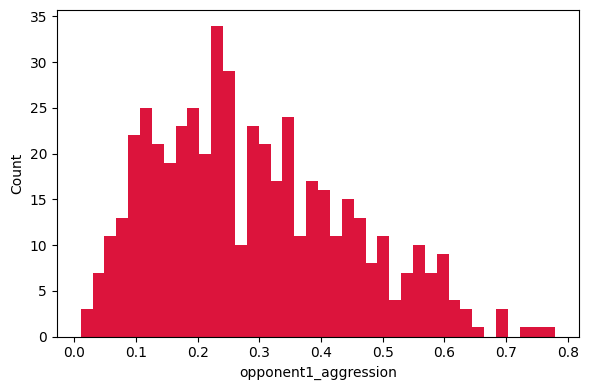

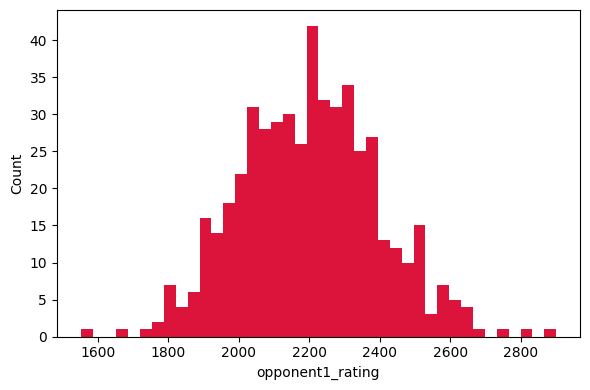

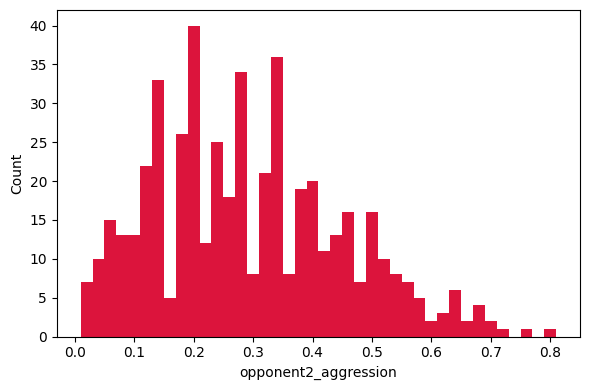

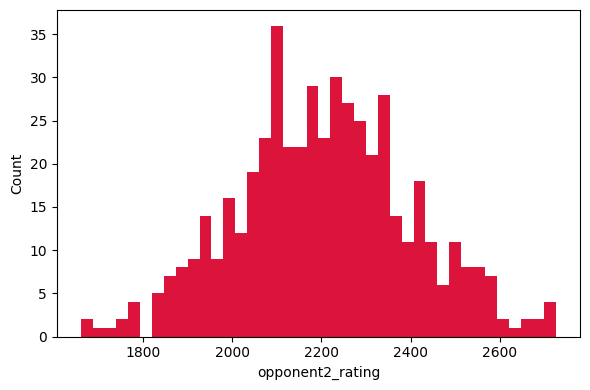

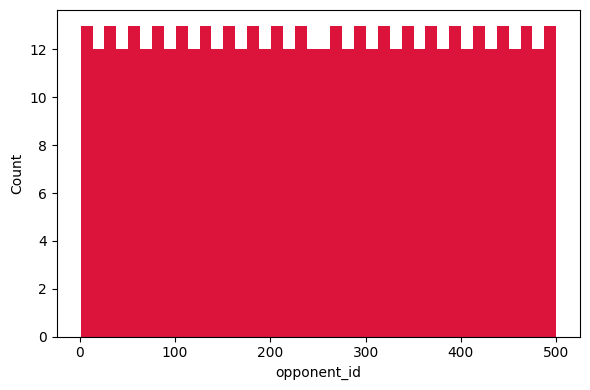

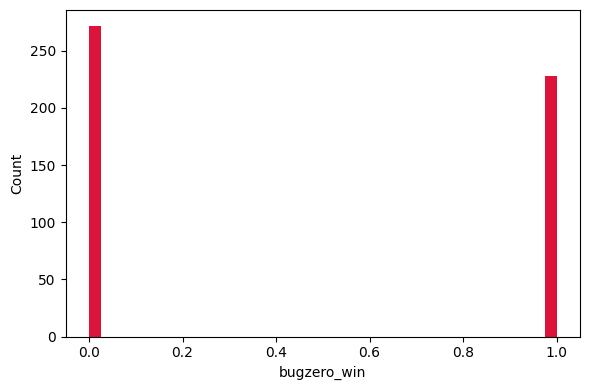

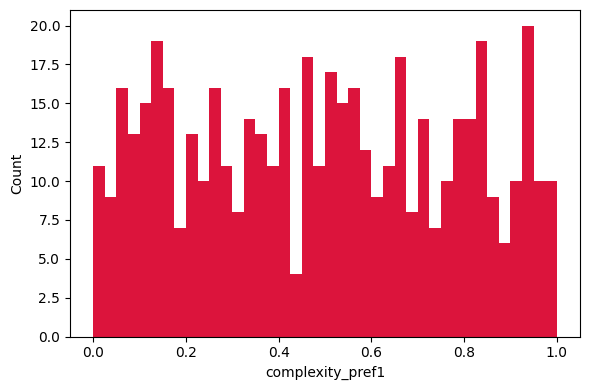

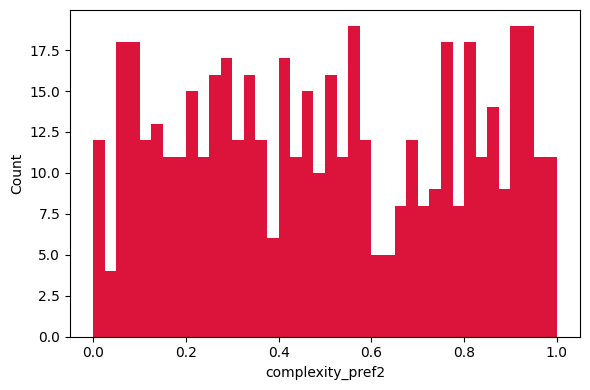

In [24]:
for i in df.describe().columns : #the columns with numerical values
    plt.figure(figsize=(6, 4))
    plt.hist(df[i] , color = 'crimson' , bins=40)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.tight_layout()  # Optional, improves spacing
    plt.show()


# The unique opening styles

In [36]:
styles = list( set ( list(df['opponent1_opening'].unique()) + list(df['opponent2_opening'].unique()) ) ) 

print(f'There are {len(styles)} unqiue opening styles')
styles

There are 6 unqiue opening styles


['French Defense',
 "King's Gambit",
 'Scandinavian Defense',
 'Sicilian Defense',
 "Queen's Gambit",
 'Ruy López']

# Encoding

In [59]:
# Create one-hot encoded columns separately (without dropping from df)
encoded = pd.get_dummies(df[["opponent1_opening", "opponent2_opening"]],
                         prefix=["op1", "op2"],
                         drop_first=True,
                         dtype=int)

# Concatenate with original df
df_encoded = pd.concat([df, encoded], axis=1)


# Feature importance

In [60]:
df.columns

Index(['complexity_pref1', 'complexity_pref2', 'opponent1_aggression',
       'opponent1_opening', 'opponent1_rating', 'opponent2_aggression',
       'opponent2_opening', 'opponent2_rating', 'opponent_id', 'bugzero_win'],
      dtype='object')

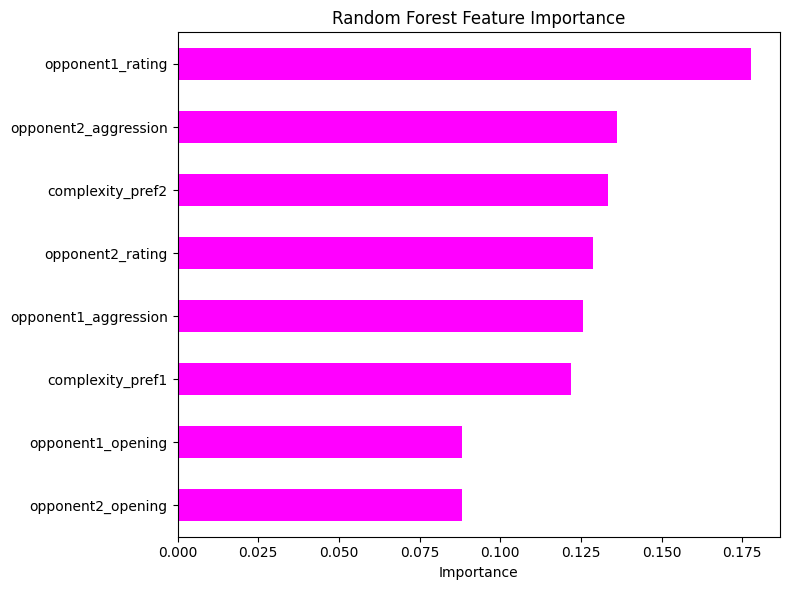

In [74]:





# Define X and y
X = df_encoded.drop(columns=['bugzero_win','opponent1_opening','opponent2_opening','opponent_id'])
y = df_encoded['bugzero_win']  # Replace with your actual target variable

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Aggregate opening and GND importances
op1_cols = [col for col in X.columns if col.startswith('op1_')]
op2_cols = [col for col in X.columns if col.startswith('op2_')]

importances_combined = importances.drop(op1_cols + op2_cols).copy()
importances_combined['opponent1_opening'] = importances[op1_cols].sum()
importances_combined['opponent2_opening'] = importances[op2_cols].sum()

# Sort for plotting
importances_combined = importances_combined.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
importances_combined.plot(kind='barh', color='magenta')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Correlation

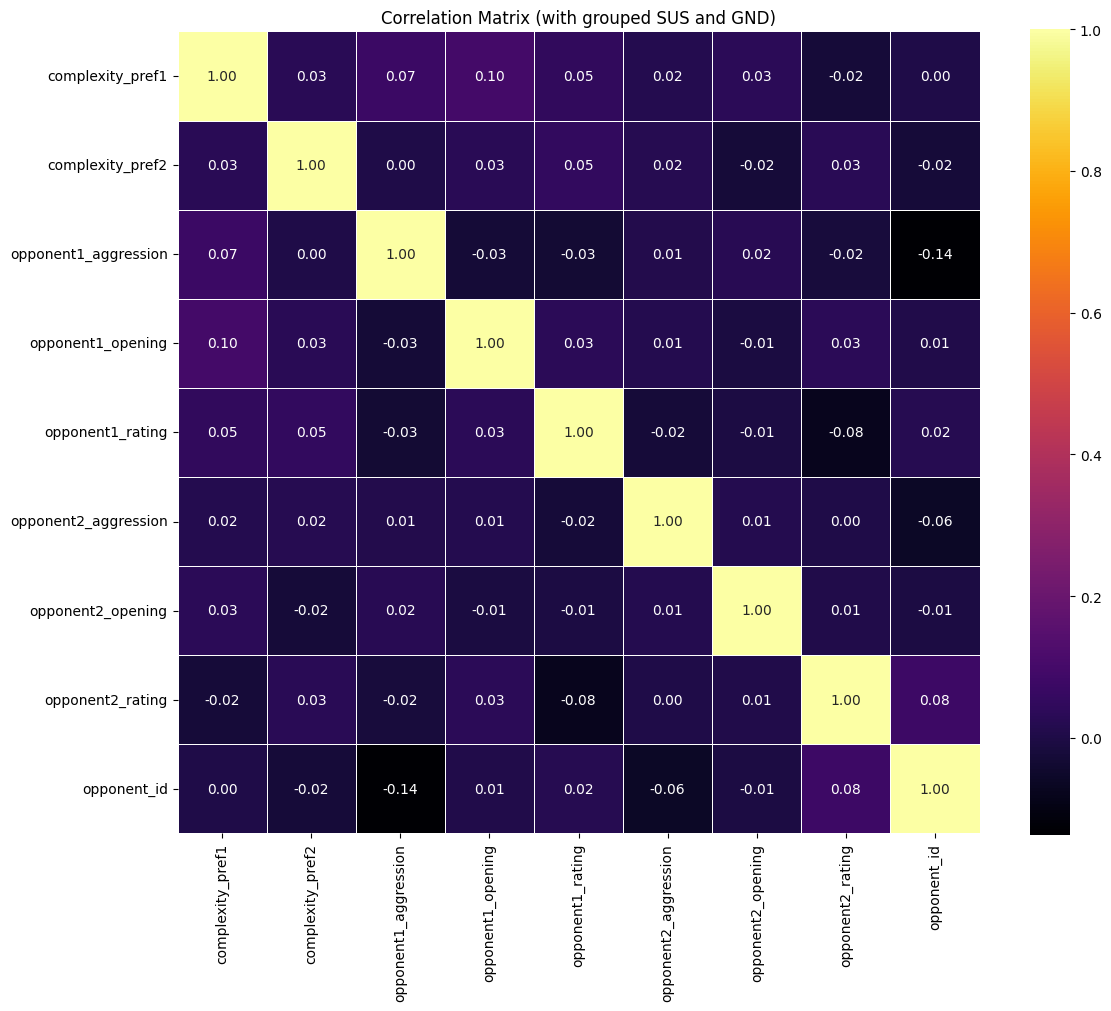

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to work on
df_corr = df_encoded.copy()



# Convert to numeric codes for correlation
df_corr['opponent1_opening'] = df_corr['opponent1_opening'].astype('category').cat.codes
df_corr['opponent2_opening'] = df_corr['opponent2_opening'].astype('category').cat.codes

# Drop original one-hot columns and 'HMNS'
to_drop = [col for col in df_corr.columns if col.startswith(('op1_', 'op2_', 'bugzero_win'))]
df_corr = df_corr.drop(columns=to_drop)                              
# Compute correlation matrix
corr_matrix = df_corr.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='inferno', annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix (with grouped SUS and GND)')
plt.tight_layout()
plt.show()


# Visualizations

In [75]:
df.columns

Index(['complexity_pref1', 'complexity_pref2', 'opponent1_aggression',
       'opponent1_opening', 'opponent1_rating', 'opponent2_aggression',
       'opponent2_opening', 'opponent2_rating', 'opponent_id', 'bugzero_win'],
      dtype='object')

In [79]:
df_encoded.columns

Index(['complexity_pref1', 'complexity_pref2', 'opponent1_aggression',
       'opponent1_opening', 'opponent1_rating', 'opponent2_aggression',
       'opponent2_opening', 'opponent2_rating', 'opponent_id', 'bugzero_win',
       'op1_King's Gambit', 'op1_Queen's Gambit', 'op1_Ruy López',
       'op1_Scandinavian Defense', 'op1_Sicilian Defense', 'op2_King's Gambit',
       'op2_Queen's Gambit', 'op2_Ruy López', 'op2_Scandinavian Defense',
       'op2_Sicilian Defense'],
      dtype='object')

In [88]:
df['opponent1_opening'].unique()

array(['French Defense', 'Ruy López', 'Sicilian Defense',
       "Queen's Gambit", 'Scandinavian Defense', "King's Gambit"],
      dtype=object)

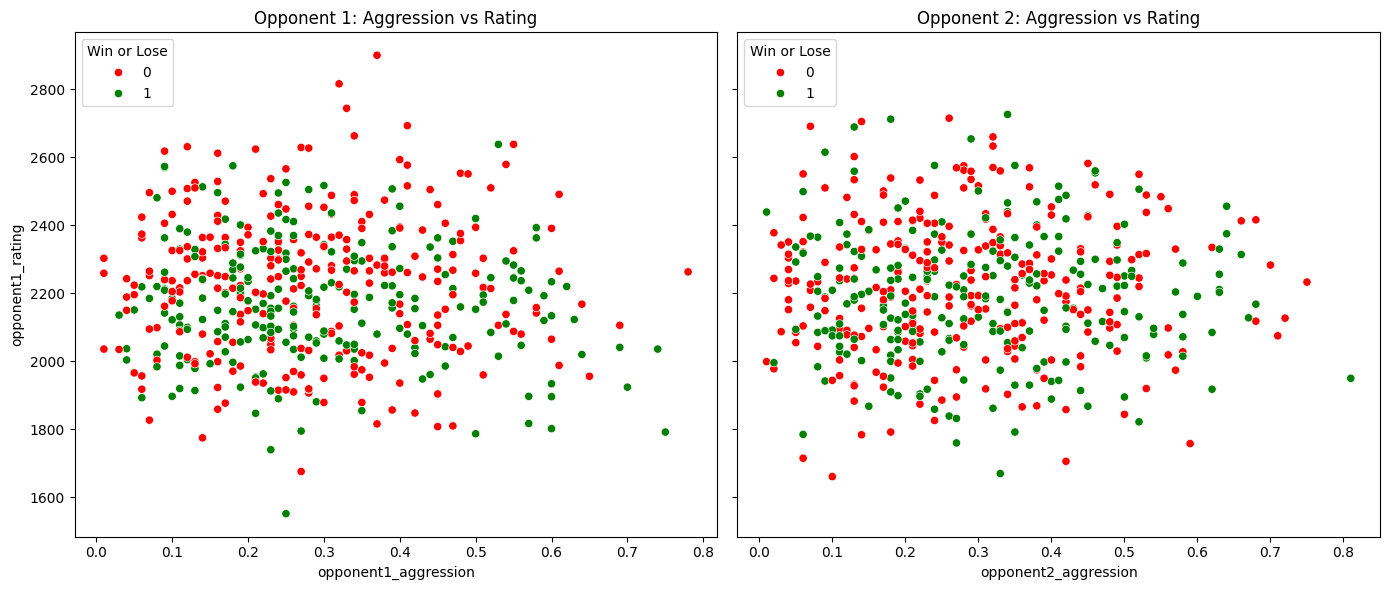

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color palette for binary target (e.g., 0 = lose, 1 = win)
custom_palette2 = {
    0: 'red',
    1: 'green'
}

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for opponent1
sns.scatterplot(
    data=df,
    x='opponent1_aggression',
    y='opponent1_rating',
    hue=df.columns[-1],
    palette=custom_palette2,
    ax=axes[0]
)
axes[0].set_title('Opponent 1: Aggression vs Rating')
axes[0].legend(title='Win or Lose', loc='upper left')

# Plot for opponent2
sns.scatterplot(
    data=df,
    x='opponent2_aggression',
    y='opponent2_rating',
    hue=df.columns[-1],
    palette=custom_palette2,
    ax=axes[1]
)
axes[1].set_title('Opponent 2: Aggression vs Rating')
axes[1].legend(title='Win or Lose', loc='upper left')

plt.tight_layout()
plt.show()


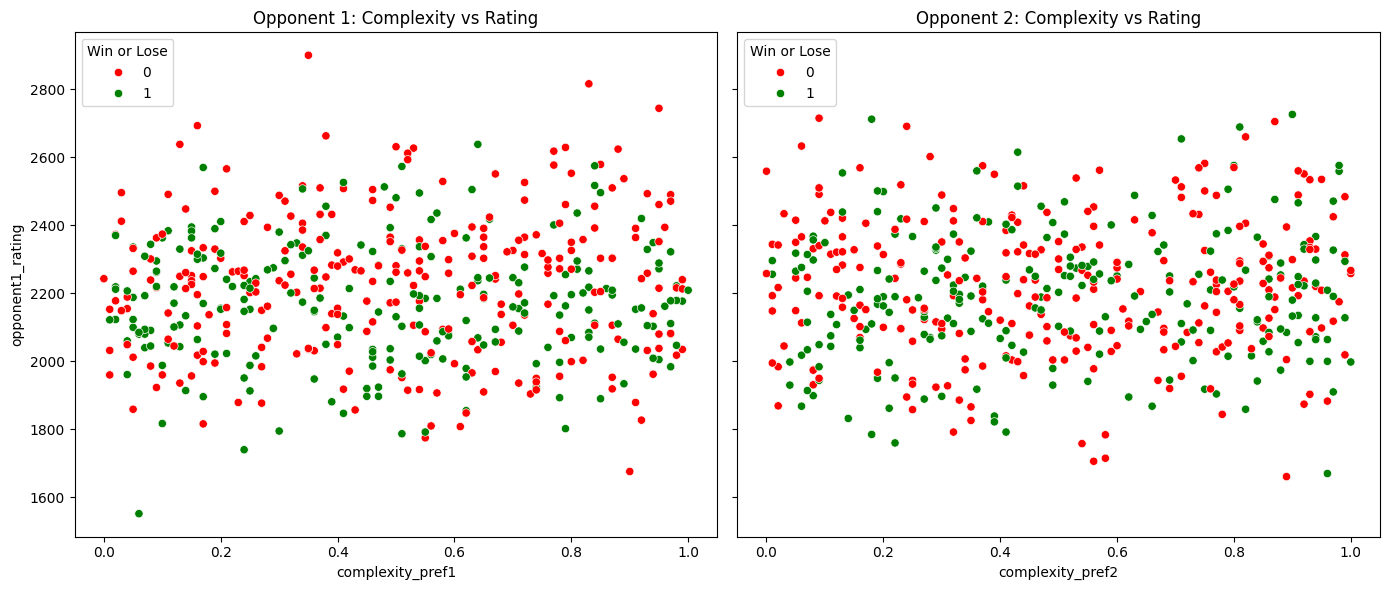

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color palette for binary target (e.g., 0 = lose, 1 = win)
custom_palette2 = {
    0: 'red',
    1: 'green'
}

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for opponent1
sns.scatterplot(
    data=df,
    x='complexity_pref1',
    y='opponent1_rating',
    hue=df.columns[-1],
    palette=custom_palette2,
    ax=axes[0]
)
axes[0].set_title('Opponent 1: Complexity vs Rating')
axes[0].legend(title='Win or Lose', loc='upper left')

# Plot for opponent2
sns.scatterplot(
    data=df,
    x='complexity_pref2',
    y='opponent2_rating',
    hue=df.columns[-1],
    palette=custom_palette2,
    ax=axes[1]
)
axes[1].set_title('Opponent 2: Complexity vs Rating')
axes[1].legend(title='Win or Lose', loc='upper left')

plt.tight_layout()
plt.show()


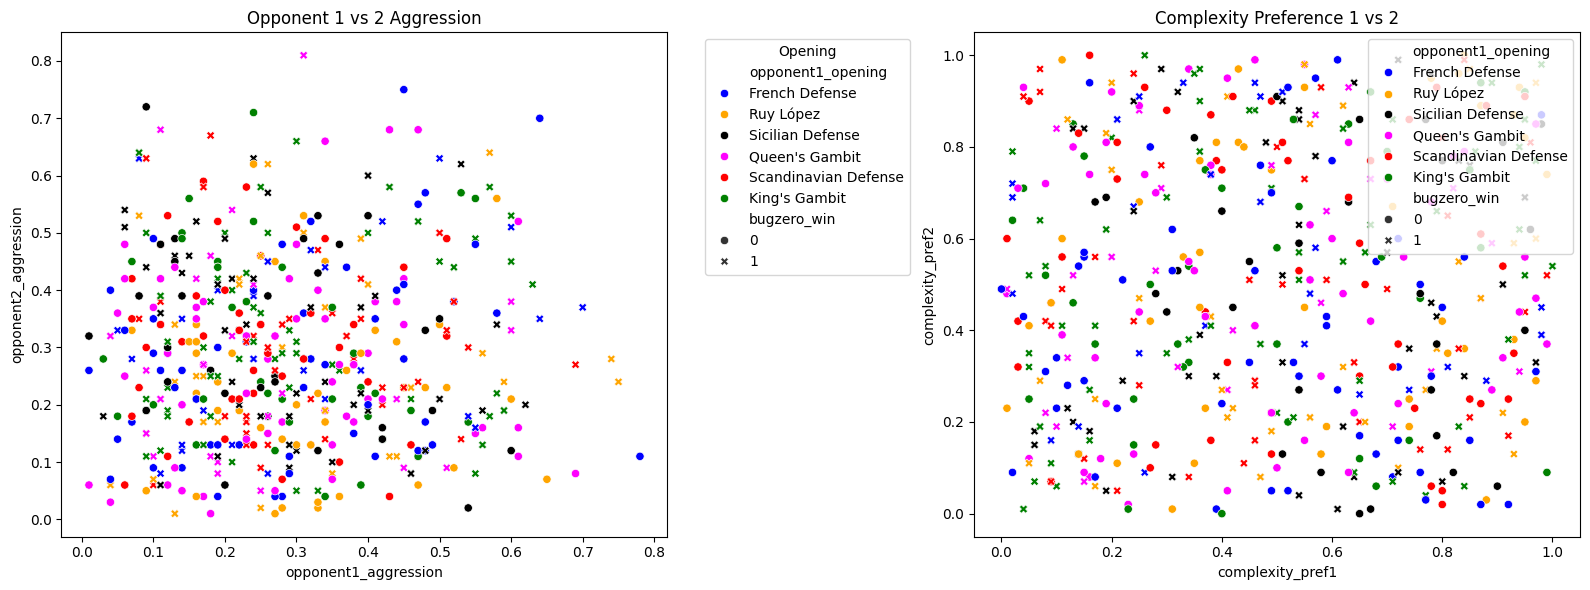

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your color palette for openings
custom_palette2 = {
    'French Defense': 'blue',
    'Ruy López': 'orange',
    'Sicilian Defense': 'black',
    "Queen's Gambit": 'magenta',
    'Scandinavian Defense': 'red',
    "King's Gambit": 'green'
}

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Aggression
sns.scatterplot(
    data=df,
    x='opponent1_aggression',
    y='opponent2_aggression',
    hue='opponent1_opening',
    style=df.columns[-1],
    palette=custom_palette2,
    ax=axes[0]
)
axes[0].set_title('Opponent 1 vs 2 Aggression')
axes[0].legend(title='Opening', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second plot: Complexity Preference
sns.scatterplot(
    data=df,
    x='complexity_pref1',
    y='complexity_pref2',
    hue='opponent1_opening',
    style=df.columns[-1],
    palette=custom_palette2,
    ax=axes[1]
)
axes[1].set_title('Complexity Preference 1 vs 2')

# Adjust layout
plt.tight_layout()
plt.show()


# Outliers

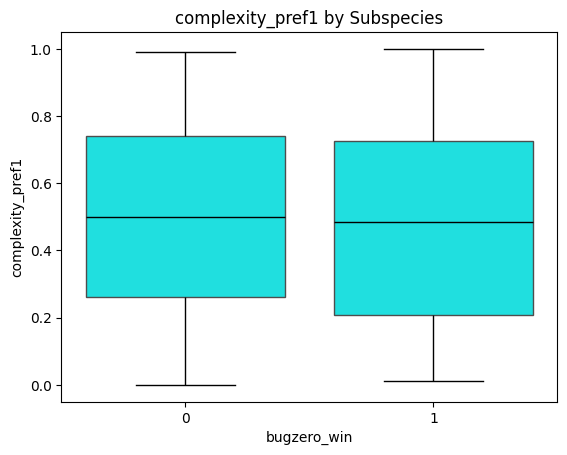

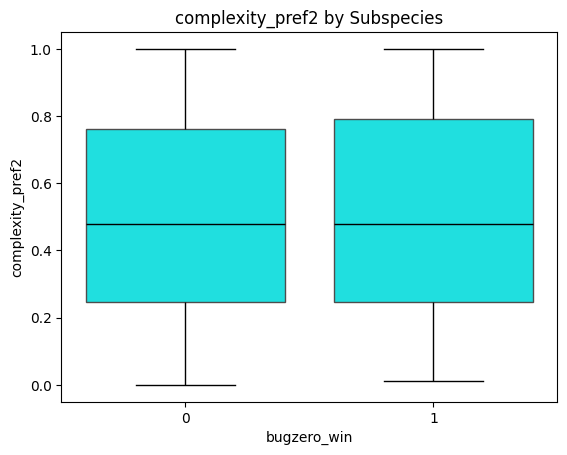

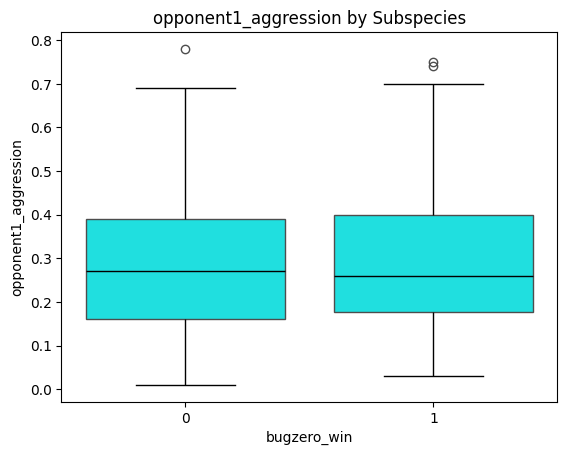

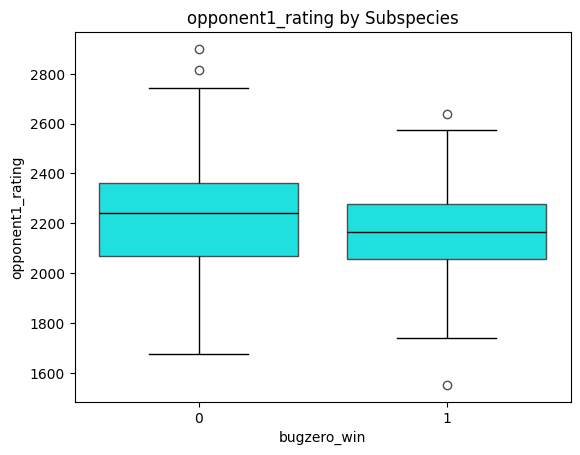

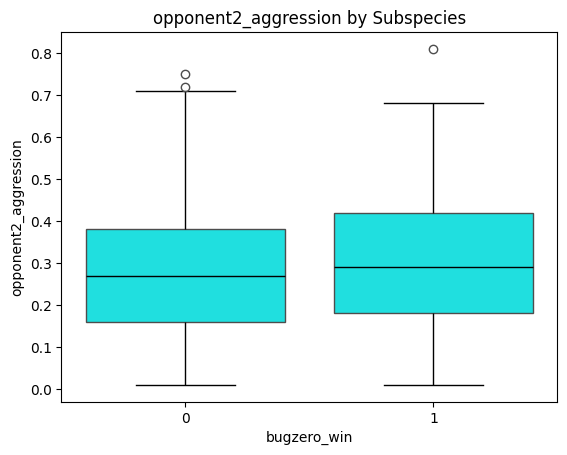

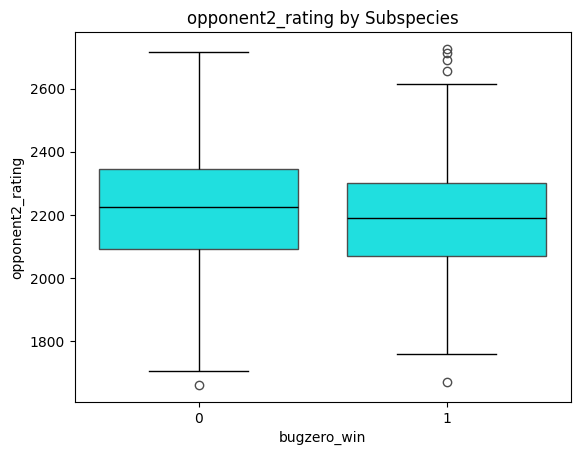

In [106]:
for i in ['complexity_pref1', 'complexity_pref2', 'opponent1_aggression',
        'opponent1_rating', 'opponent2_aggression',
        'opponent2_rating',] :
    sns.boxplot(data=df, x='bugzero_win', y=i , color='cyan',
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        medianprops=dict(color='black')
               )
    plt.title(f'{i} by Subspecies')
    plt.show()